#        ----------------------------- DESIGN PATTERNS -----------------------
#        ______CREATIONAL PATTERNS

## Factory 

In [3]:
class Dog:
    # a simple class
    def __init__(self, name):
        self._name = name
    def speak(self):
        return "woof!"

In [4]:
class Cat:
    # a simple class
    def __init__(self, name):
        self._name = name
    def speak(self):
        return "meaw!"

In [5]:
def get_pet(pet:"dog"):
    # factory method
    pets = dict(dog=Dog("tabby"),cat=Cat("kitty"),)
    return pets[pet]

In [6]:
d = get_pet("dog")

print(d.speak())

c = get_pet("cat")

print(c.speak())

woof!
meaw!


Abstract factory is an interface for creating related objects but factory method is a method. Abstract factory is implemented by factory method.

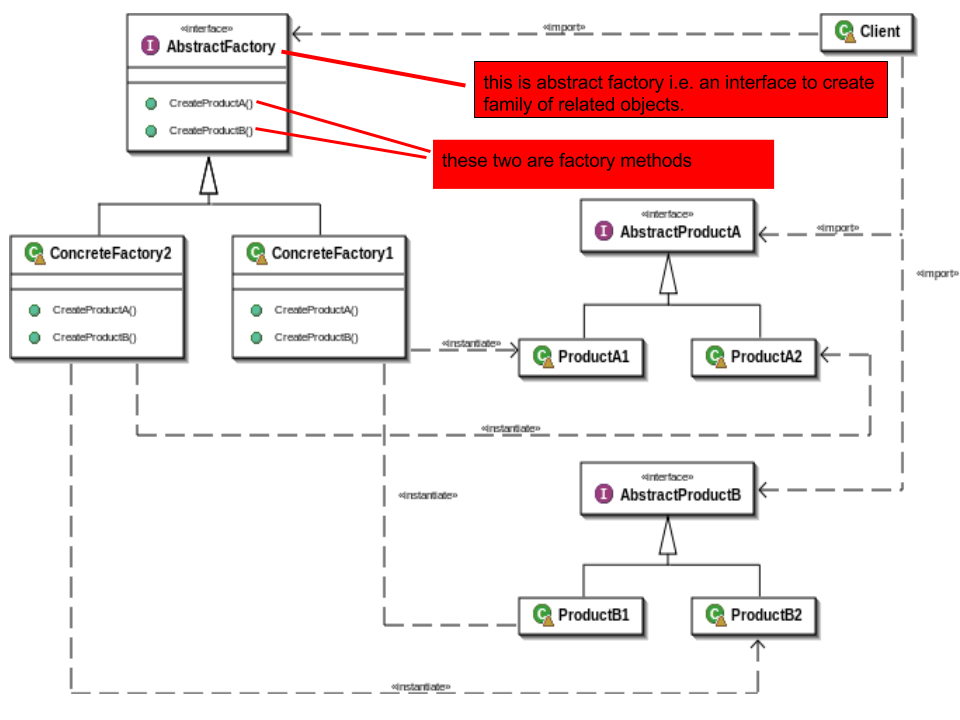 

## Abstract Factory

In [7]:
class Dog:
    """One of the objects to be returned"""
    def speak(self):
        return "Woof!"

    def __str__(self):
        return "Dog"

In [8]:
class DogFactory:
    """Concrete Factory"""
    def get_pet(self):
        """Returns a Dog object"""
        return Dog()

    def get_food(self):
        """Returns a Dog Food object"""
        return "Dog Food!"

In [10]:
class PetStore:
    """ PetStore houses our Abstract Factory """

    def __init__(self, pet_factory=None):
        """ pet_factory is our Abstract Factory """

        self._pet_factory = pet_factory
        
#         print("THIS IS FACTORY", pet_factory,type(pet_factory))


    def show_pet(self):
        """ Utility method to display the details of the objects retured by the DogFactory """

        pet = self._pet_factory.get_pet()
        
        pet_food = self._pet_factory.get_food()

        print("Our pet is '{}'!".format(pet))
        print("Our pet says hello by '{}'".format(pet.speak()))
        print("Its food is '{}'!".format(pet_food))

In [11]:
#Create a Concrete Factory
factory = DogFactory()

#Create a pet store housing our Abstract Factory
shop = PetStore(factory)

#Invoke the utility method to show the details of our pet
shop.show_pet()

THIS IS FACTORY <__main__.DogFactory object at 0x7f2ee57aee10> <class '__main__.DogFactory'>
Our pet is 'Dog'!
Our pet says hello by 'Woof!'
Its food is 'Dog Food!'!


## Singleton Pattern

In [37]:
class Borg:
    """Borg pattern making the class attributes global"""
    _shared_data = {"count":0} # Attribute dictionary

    def __init__(self):
        self.__dict__ = self._shared_data # Make it an attribute dictionary

In [40]:
class Singleton(Borg): 
#Inherits from the Borg class
#     """This class now shares all its attributes among its various instances"""
    #This essenstially makes the singleton objects an object-oriented global variable
    
    def __init__(self):
#         print(self._shared_data)
        Borg.__init__(self)
        self._shared_data["count"] += 1 # Update the attribute dictionary by inserting a new key-value pair 
    
    def return_flag(self):
        return self._shared_data
#     def __str__(self):
#         return str(self._shared_data) # Returns the attribute dictionary for printing

#Let's create a singleton object and add our first acronym
 

# #Let's create another singleton object and if it refers to the same attribute dictionary by adding another acronym.
# y = Singleton(SNMP="mple Network Management Protocol")
# # Print the object
# print(y)

In [39]:
x = Singleton()
x._shared_data
# Print the object
# print(x.return_flag())

{'count': 1}

In [43]:
Singleton()

In [44]:
x._shared_data

{'count': 3}

## Builder Pattern

In [35]:
class Director():
    """Director"""
    def __init__(self, builder):
        print(builder)
        self._builder = builder 
        
    def construct_car(self):
        self._builder.create_new_car()
        self._builder.add_model()
        self._builder.add_tires()
        self._builder.add_engine()
#         self._builder.super_def()
        
    def get_car(self):
#         print("-------",self._builder.car)
        return self._builder.car
        

In [36]:
 class Builder():
    """Abstract Builder"""
    def __init__(self):
        self.car = None 
        
    def create_new_car(self):
        self.car = Car()
        

In [37]:
class SkyLarkBuilder(Builder):
    """Concrete Builder --> provides parts and tools to work on the parts """
    
    def super_def(self):
        print(Builder)
#         Builder.__init__(self)
        print(Builder.create_new_car(self))
#         print("From CONC",self.car)
#         Builder.create_new_car(self)
    def add_model(self):
        print(self.car.model)
        self.car.model = "Skylark"
        print(self.car.model)
    def add_tires(self):
        self.car.tires = "Regular tires"

    def add_engine(self):    
        self.car.engine = "Turbo engine"

In [38]:
class TeslaBuilder(Builder):
    """Concrete Builder --> provides parts and tools to work on the parts """
    
    def super_def(self):
        print(Builder)
#         Builder.__init__(self)
        print(Builder.create_new_car(self))
#         print("From CONC",self.car)
#         Builder.create_new_car(self)
    def add_model(self):
        print(self.car.model)
        self.car.model = "Tesla"
        print(self.car.model)
    def add_tires(self):
        self.car.tires = "Automatic tires"

    def add_engine(self):    
        self.car.engine = "Efficient engine"

In [45]:
class Car():
    """Product"""
    def __init__(self):
        self.model = None
        self.tires = None
        self.engine = None
        
    def __str__(self):
        return '{} | {} | {}'.format(self.model, self.tires, self.engine)

In [46]:
builder = SkyLarkBuilder()
director = Director(builder)
director.construct_car()
car = director.get_car()
print(car)

None
Skylark
Skylark | Regular tires | Turbo engine


## Prototype

In [35]:
import copy

class Prototype:
    
    def __init__(self):
        self._objects = {}
        
    def register_object(self, name, obj):
        """Register an object"""
        print(obj,type(obj))
        self._objects[name] = obj
        print(type(self._objects))
        print("--------------\n")
        
    def unregister_object(self, name):
        """Unregister an object"""
        del self._objects[name]
        
    def clone(self, name, **kwargs):
        """Clone a registered object and update its attributes"""
        

        obj = copy.deepcopy(self._objects.get(name))
        print("----",obj.__dict__)
        obj.__dict__.update(kwargs)
        print("after updateing")
        print(obj.__dict__)
        return obj

In [36]:
class Car:
    def __init__(self):
        self.name = "Skylark"
        self.color = "Red"
        self.options = "Ex"
        
    def __str__(self):
        return '{} | {} | {}'.format(self.name, self.color, self.options)

In [39]:
c = Car()
prototype = Prototype()
prototype.register_object('skylark',c)
new = {'options': 'New','color':'red'}
c1 = prototype.clone('skylark', **new)

print(c1)

Skylark | Red | Ex <class '__main__.Car'>
<class 'dict'>
--------------

---- {'name': 'Skylark', 'color': 'Red', 'options': 'Ex'}
after updateing
{'name': 'Skylark', 'color': 'red', 'options': 'New'}
Skylark | red | New


### deepcopy

In [56]:
from copy import deepcopy
col2 = deepcopy(col1)

In [33]:
col2[2][0] = 'n'

In [34]:
col2

['a', 'b', ['n', 'd']]

In [112]:
col1[1] = 5

In [113]:
col2

[1, 5]

In [134]:
class code:
    def __init__(self):
        self.name = "objects"
        self.color = "black"
        self.options = "pro"

In [135]:
def register(name,obj):
    obj_dict = {}
    obj_dict[name] = obj
    
    return obj_dict

In [136]:
c = code()

In [137]:
type(c)

__main__.code

In [139]:
reg_dict = register('code',c)

In [143]:
name = 'code'
obj = copy.deepcopy(reg_dict.get(name))

In [145]:
obj.name

'objects'